__Importing the libraries__

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

__Loading the Dataset__

In [2]:
jena_df = pd.read_csv("jena_climate_2009_2016.csv")

#Renaming the columns
jena_df = jena_df.rename(columns={"Date Time": "DateTime", "p (mbar)": "Pressure", "T (degC)": "TempCelsius", "Tpot (K)": "TempKelvin", "Tdew (degC)": "TempDewCelsius",
                        "rh (%)": "RelativeHumidity", "VPmax (mbar)": "SatVapourPress", "VPact (mbar)": "VapourPressure", "VPdef (mbar)": "VapPressDeficit",
                        "sh (g/kg)": "SpecificHumidity", "H2OC (mmol/mol)": "WaterVapConc", "rho (g/m**3)": "AirDensity", "wv (m/s)": "WindSpeed",
                        "max. wv (m/s)": "MaxWindSpeed", "wd (deg)": "WindDirDegrees"})

jena_df.head()

,DateTime,Pressure,TempCelsius,TempKelvin,TempDewCelsius,RelativeHumidity,SatVapourPress,VapourPressure,VapPressDeficit,SpecificHumidity,WaterVapConc,AirDensity,WindSpeed,MaxWindSpeed,WindDirDegrees
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


__Sampling the Data__

The data is recorded over every 10 minutes for 8 years. Since, the temperature does not change for by much in an hour, we are sampling the data for every hour.

In [3]:
jena_df = jena_df[5::6]
jena_df.head()

,DateTime,Pressure,TempCelsius,TempKelvin,TempDewCelsius,RelativeHumidity,SatVapourPress,VapourPressure,VapPressDeficit,SpecificHumidity,WaterVapConc,AirDensity,WindSpeed,MaxWindSpeed,WindDirDegrees
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


#Exploring the data
##### All the variables in the data are numeric and the units of all the variables are different from each other. Hence, the scale for the measurement f each variable is different. 

In [4]:
#print(jena_df.dtypes)
jena_df.describe()

,Pressure,TempCelsius,TempKelvin,TempDewCelsius,RelativeHumidity,SatVapourPress,VapourPressure,VapPressDeficit,SpecificHumidity,WaterVapConc,AirDensity,WindSpeed,MaxWindSpeed,WindDirDegrees
count,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000,70091.000000
mean,989.212842,9.450482,283.493086,4.956471,76.009788,13.576576,9.533968,4.042536,6.022560,9.640437,1216.061232,1.702567,2.963041,174.789095
std,8.358886,8.423384,8.504424,6.730081,16.474920,7.739883,4.183658,4.898549,2.655812,4.234862,39.974263,65.447512,75.597657,86.619431
min,913.600000,-22.760000,250.850000,-24.800000,13.880000,0.970000,0.810000,0.000000,0.510000,0.810000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.350000,277.440000,0.240000,65.210000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.300000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.980000,198.100000
75%,994.720000,15.480000,289.530000,10.080000,89.400000,17.610000,12.360000,5.300000,7.800000,12.490000,1242.765000,2.860000,4.740000,234.000000
max,1015.290000,37.280000,311.210000,23.060000,100.000000,63.770000,28.250000,46.010000,18.070000,28.740000,1393.540000,14.010000,23.500000,360.000000


__Checking the data for Missing values__

There are no missing values in the data.

In [5]:
jena_df.isnull().sum()

DateTime            0
Pressure            0
TempCelsius         0
TempKelvin          0
TempDewCelsius      0
RelativeHumidity    0
SatVapourPress      0
VapourPressure      0
VapPressDeficit     0
SpecificHumidity    0
WaterVapConc        0
AirDensity          0
WindSpeed           0
MaxWindSpeed        0
WindDirDegrees      0
dtype: int64

__Boxplot Distribution Analysis__

We are plotting boxplot for all the numerical variables. It gives us an idea about the distribution of the variables. It can be seen that the outliers are present in all the variables.

'WindSpeed' and 'MaxWindSpeed' have extreme outliers with negative values.

'SatVapPress' and 'VapPressDef' also have more number of outliers on the higher end. 

'RelativeHumidity' and 'VapPressDef' have skewed distribution, while other cases, it looks they have a normal distribuion.

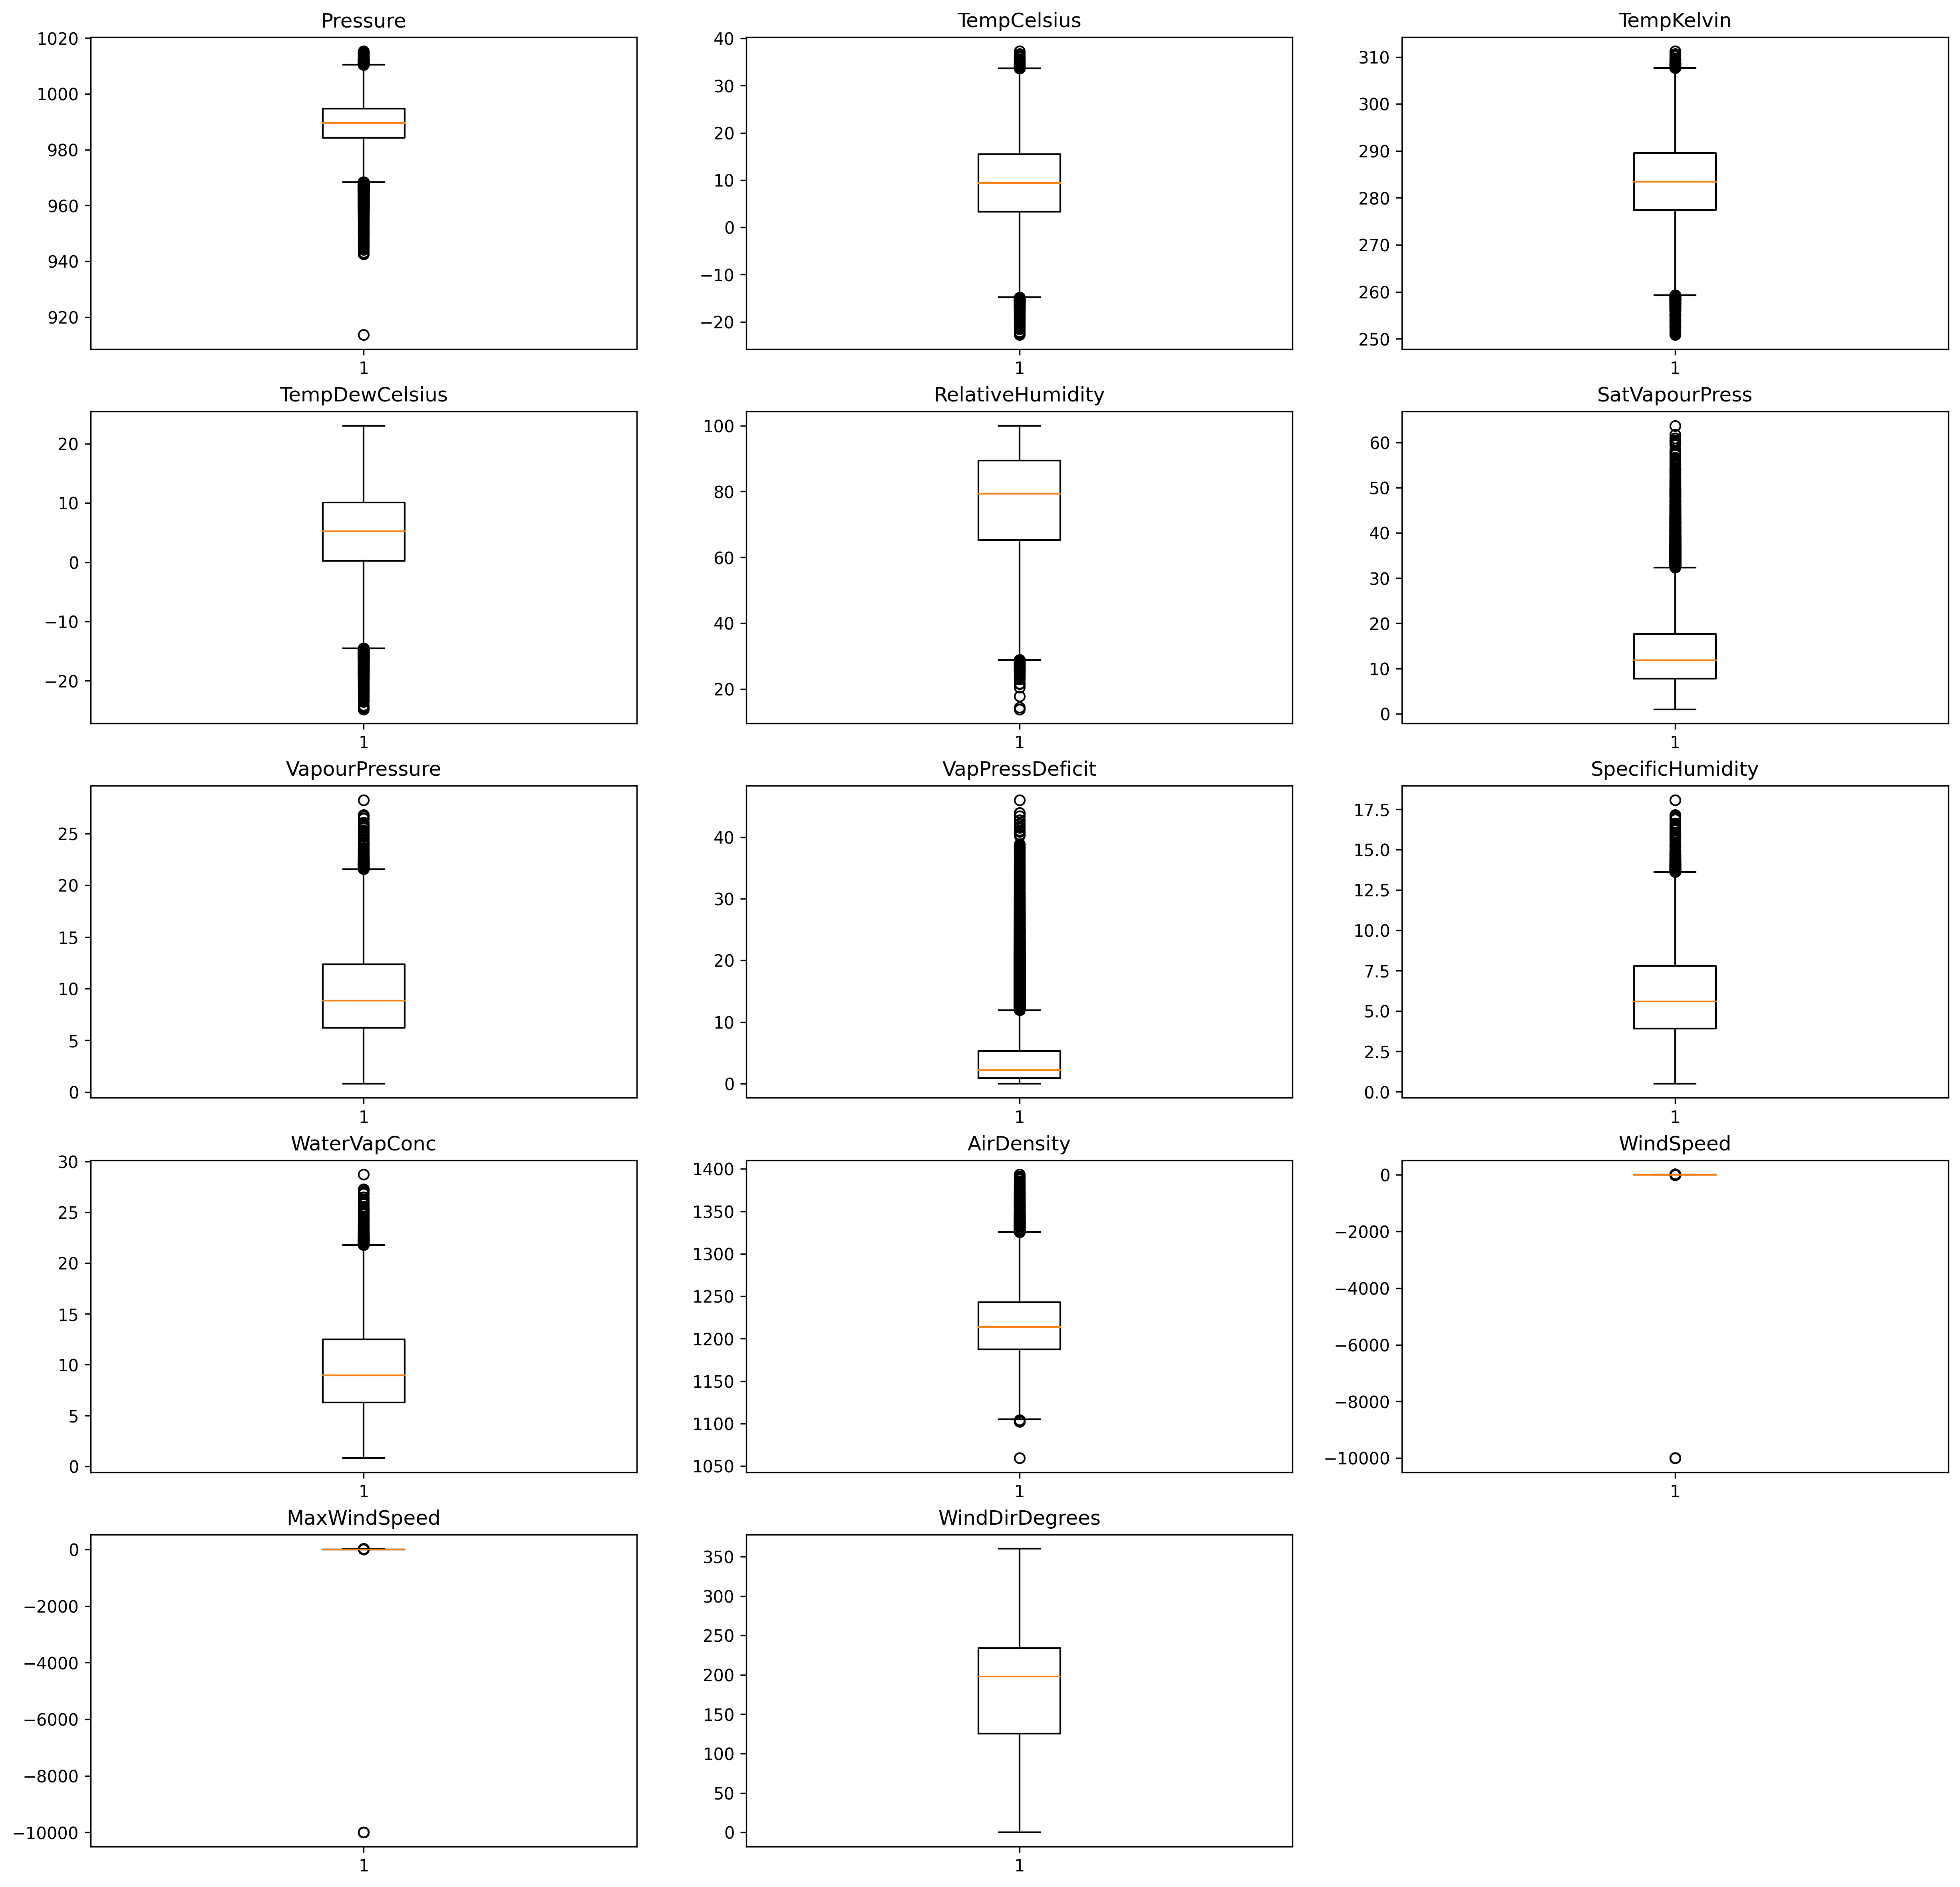

In [6]:
num_var = jena_df.columns.values[1:]
plt.figure(figsize=(20,20), dpi=300)

for i in range(len(num_var)):
    plt.subplot(5,3,i+1)
    plt.boxplot(jena_df[num_var[i]])
    plt.title(num_var[i])

__Trendline Analysis of each variable__

This plot analyzes the distribution of the variables over time factor. Since, this is a weather data, all the the variables seem to follow a seasonal patter (except Wind Direction and Wind Speeds).

Wind Speed and have Max Wind Speed have to be treated for outliers. Wind Direction have constant values over the time and there is no trend or seasonality.

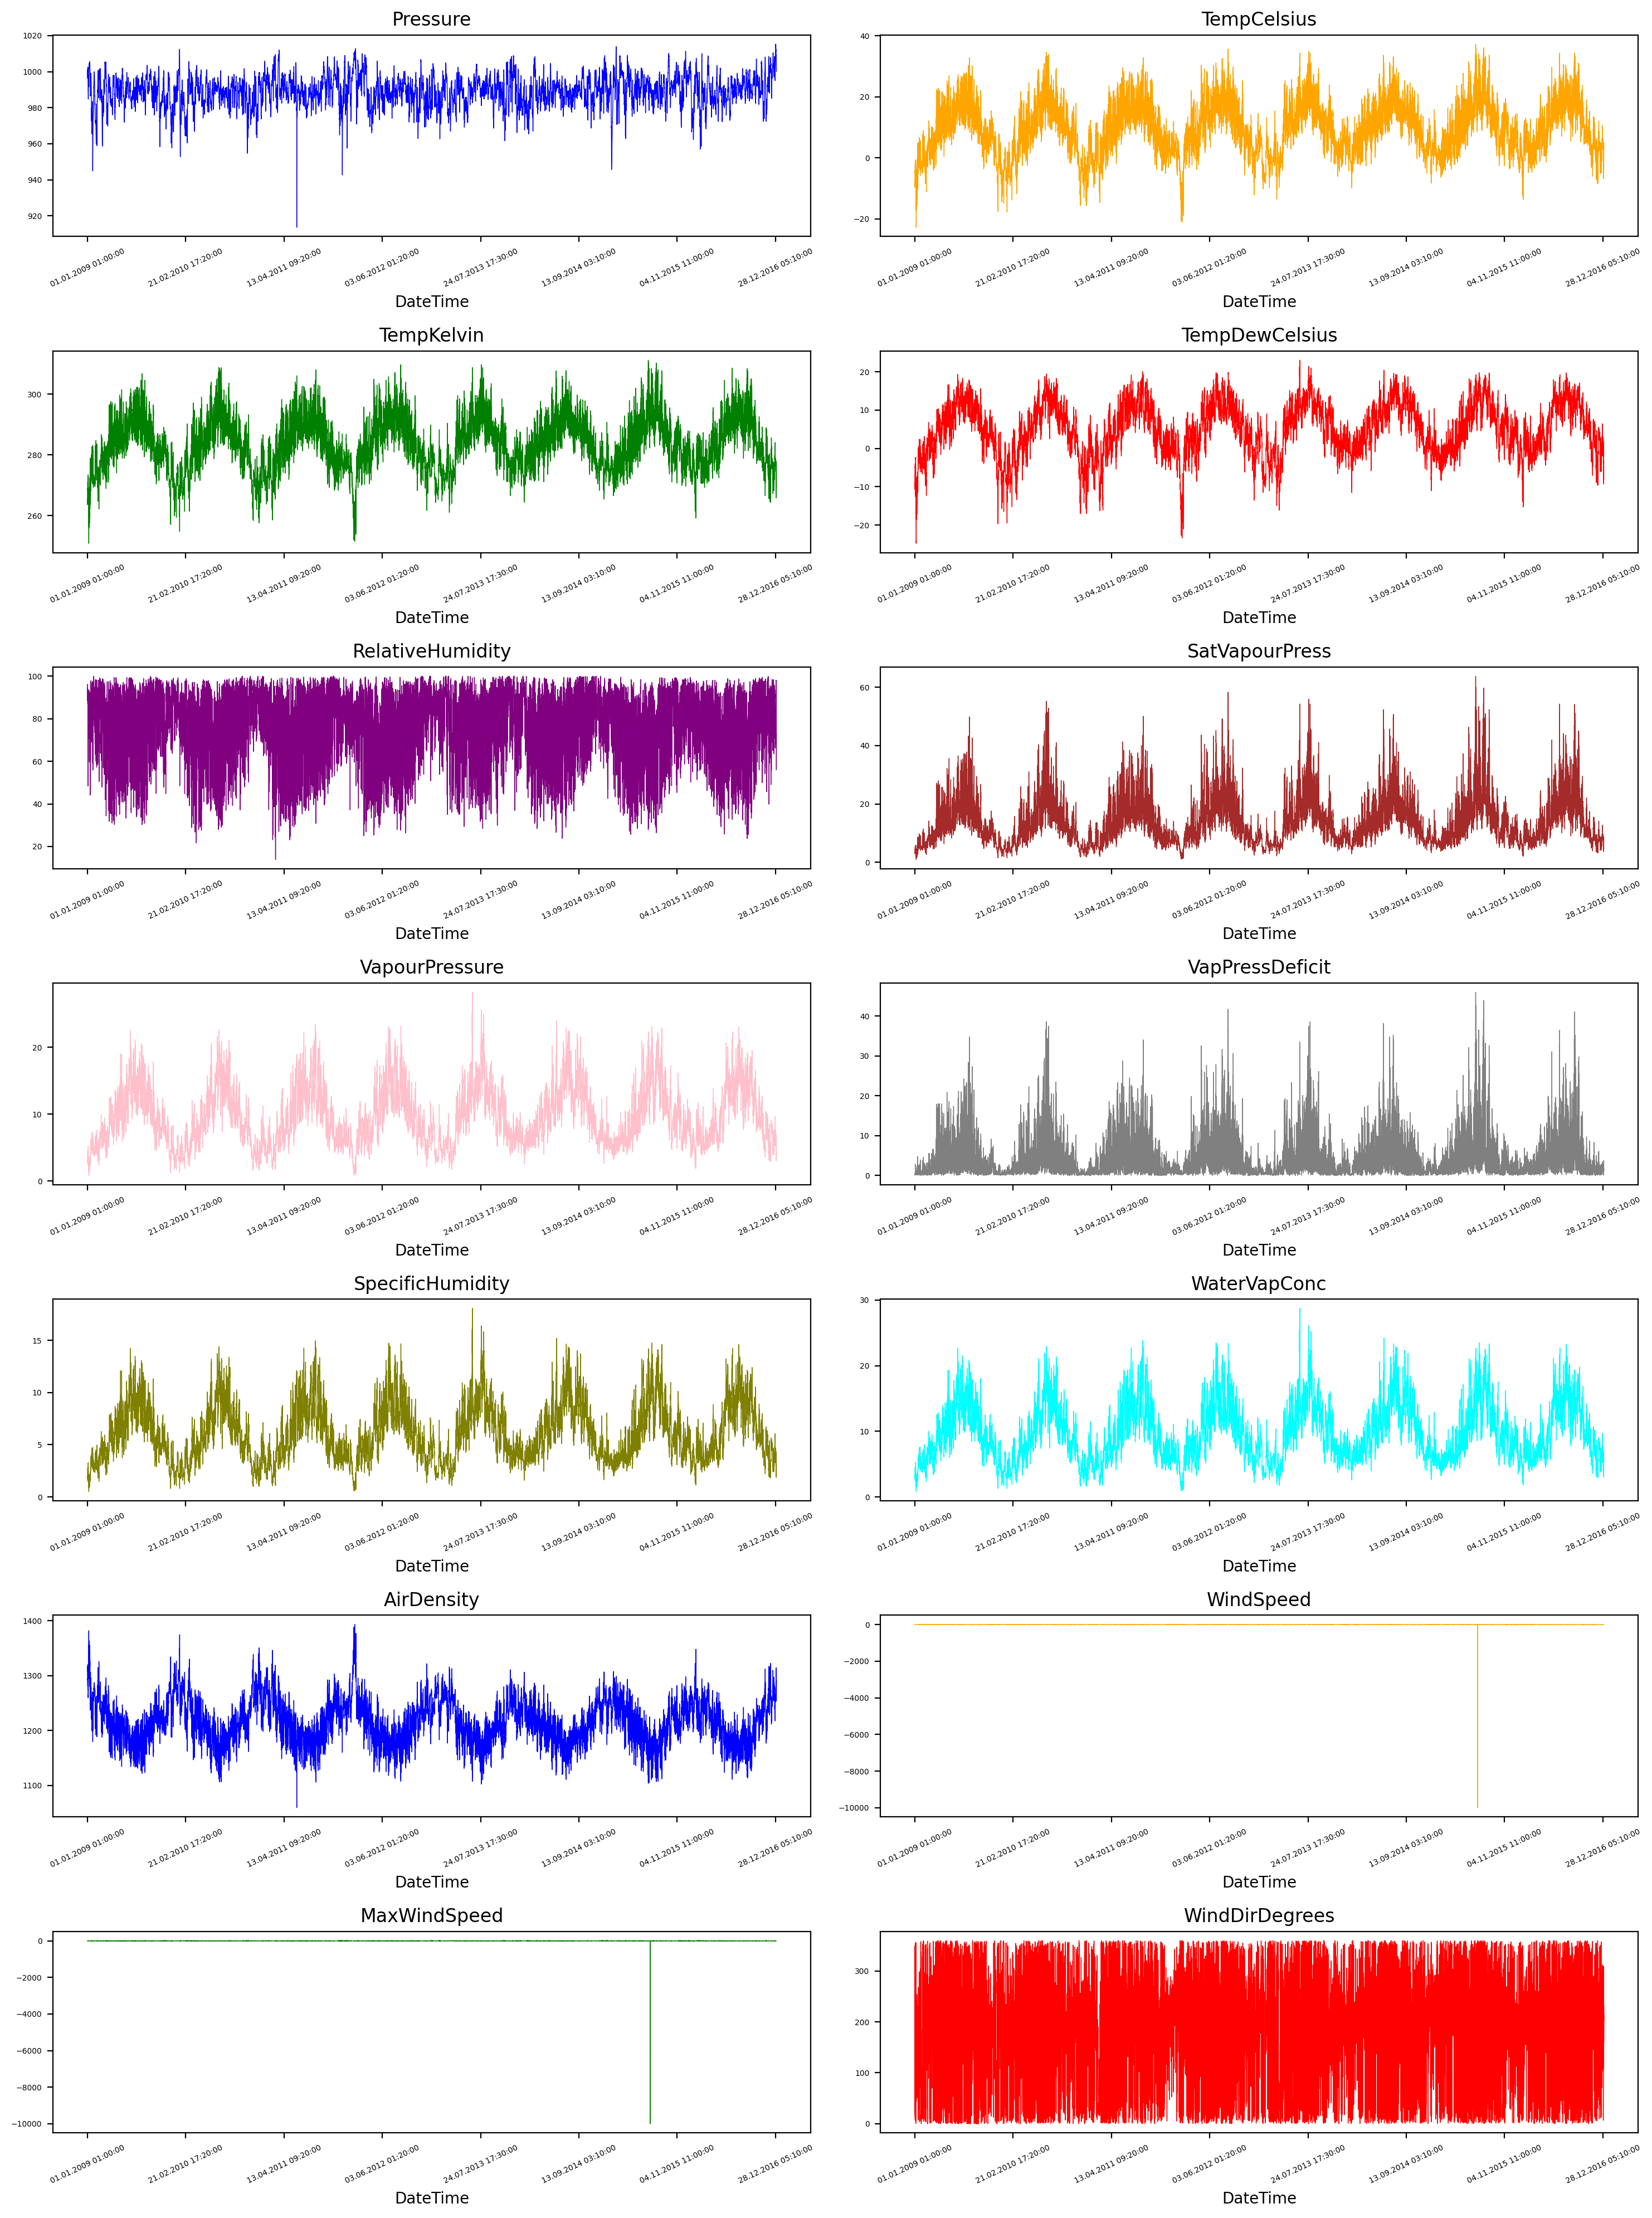

In [7]:
time_data = jena_df['DateTime']
colors = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan"]
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), dpi=200, facecolor="w", edgecolor="k")
for i in range(len(num_var)):
    key = num_var[i]
    c = colors[i % (len(colors))]
    t_data = jena_df[key]
    t_data.index = time_data
    t_data.head()
    ax = t_data.plot(ax=axes[i // 2, i % 2],color=c,rot=25, title = num_var[i], fontsize= 5, linewidth = 0.5)
plt.tight_layout()

__Correlation Matrix__

The coefficient of correlation between TempCelsius and 'TempKelvin' is 1. Hence, we can remove 'Tempcelsius' and reduce the size of the data by removing redundant variables. Temperature in celsius is nothing but 273.15 less than temperature in kelvin. Hence, we can definitely, remove one of the variables. In this case, it is TempCelsius.

Similarly, 'VapourPressure', 'SpecificHumidity' and 'WaterVapConc' have a correlation coefficient of 1 between them. Hence, we can remove 'VapourPressure' and 'WaterVapConc' from the data.

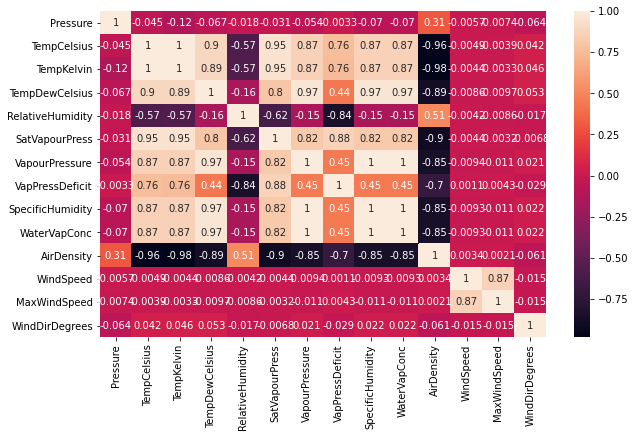

In [8]:
plt.figure(figsize=(10,6))
corrplot = sb.heatmap(jena_df.corr(), annot=True)

__Dropping unwanted columns__

In [9]:
jena_df.drop(['TempCelsius'],axis=1,inplace=True)
jena_df.drop(['VapourPressure'],axis=1,inplace=True)
jena_df.drop(['WaterVapConc'],axis=1,inplace=True)

__Fixing the unnatural values of wind speed columns__

Speed cannot have negative values. WindSpeed and MaxWindSpeed has values such as -9999.0. These values are really unusual and are affecting the distribution of the these variables as we saw earlier. Hence, we are inputing 0 in place of these values for both variables.

In [10]:
print("Count of '-9999' in WindSpeed before treating: ", sum(jena_df['WindSpeed']==-9999.0))

jena_df['WindSpeed'].replace(-9999, 0, inplace = True)
jena_df['MaxWindSpeed'].replace(-9999, 0, inplace = True)

print("Count of '-9999' in WindSpeed after treating: ", sum(jena_df['WindSpeed']==-9999.0))

Count of '-9999' in WindSpeed before treating:  3
Count of '-9999' in WindSpeed after treating:  0


__Treating the extreme outliers using IQR method__

We are using the IQR method for treating the outliers. Usually, we multiply the IQR value by 1.5 to identify the outliers. But, in the case of weather data, outliers might have meaningful information. Hence, we are using [IQR * 3] as a threshold to identify the outliers. 

Adding to that we will only be treating the variables that have abnormal distribution because of the outliers. We will preserve other outliers as they might be genuine information providers.

In [11]:
def out_treat(var):
    Q1 = np.quantile(var.dropna(), 0.25)
    Q3 = np.quantile(var.dropna(), 0.75)
    IQR = Q3-Q1
    LC = Q1 - (3 * IQR)
    UC = Q3 + (3 * IQR)
    var[var > UC] = UC
    var[var < LC] = LC
    return (var)

jena_df = jena_df[~jena_df.index.duplicated()]

jena_df.Pressure = out_treat(jena_df.Pressure)
jena_df.SatVapourPress = out_treat(jena_df.SatVapourPress)
jena_df.VapPressDeficit = out_treat(jena_df.VapPressDeficit)
jena_df.AirDensity = out_treat(jena_df.AirDensity)

__Generating vectors from wind speed and directions__

WindSpeed can be considered as the magnitude of wind and Wind direction can be the direction of the wind. Then we can transform the scalar quantities of the speed into vector quantities. After that we are extracting the x and y component of the wind vectors in 2D plane.

Hence, we are combining three variables and transforming them into 4 variables with more meaningful information.

In [12]:
wv = jena_df.pop('WindSpeed')
max_wv = jena_df.pop('MaxWindSpeed')

# Convert to radians.
wd_rad = jena_df.pop('WindDirDegrees')*np.pi / 180

# Calculate the wind x and y components.
jena_df['Wx'] = wv*np.cos(wd_rad)
jena_df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
jena_df['max Wx'] = max_wv*np.cos(wd_rad)
jena_df['max Wy'] = max_wv*np.sin(wd_rad)

__Making DateTime variables as index of the Data__

In [13]:
jena_df.set_index('DateTime',inplace=True)

__Splitting the data into train and test__

In [14]:
data = jena_df
#Splitting
test_size = round(len(data) * 0.2)
traindf = data[:-test_size]
testdf = data[-test_size:]

__Scaling the data__

Using MinMaxScaler, we fit the scaler over training model and transform both training and testing data.

In [15]:
#Scaling - Fit and Transform
min_max_scaler = MinMaxScaler()
trainsc = min_max_scaler.fit_transform(traindf)
testsc = min_max_scaler.transform(testdf)

#Converting back to Pandas dataframe
traindf = pd.DataFrame(trainsc, columns = traindf.columns, index = traindf.index)
testdf = pd.DataFrame(testsc, columns = testdf.columns, index = testdf.index)